In [2]:
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [4]:
data=pd.read_csv('falcon_9.csv')

In [18]:
data=data.drop('Unnamed: 0',axis=1)

In [19]:
data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [6]:
data.isnull().sum()

Unnamed: 0         0
FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [7]:
data['Orbit'].value_counts()

GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      90 non-null     int64  
 1   FlightNumber    90 non-null     int64  
 2   Date            90 non-null     object 
 3   BoosterVersion  90 non-null     object 
 4   PayloadMass     90 non-null     float64
 5   Orbit           90 non-null     object 
 6   LaunchSite      90 non-null     object 
 7   Outcome         90 non-null     object 
 8   Flights         90 non-null     int64  
 9   GridFins        90 non-null     bool   
 10  Reused          90 non-null     bool   
 11  Legs            90 non-null     bool   
 12  LandingPad      64 non-null     object 
 13  Block           90 non-null     float64
 14  ReusedCount     90 non-null     int64  
 15  Serial          90 non-null     object 
 16  Longitude       90 non-null     float64
 17  Latitude        90 non-null     float

In [20]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data['Outcome'].value_counts()

True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64

In [12]:
for i,outcome in enumerate(data['Outcome']):
    print(i,outcome)

0 None None
1 None None
2 None None
3 False Ocean
4 None None
5 None None
6 True Ocean
7 True Ocean
8 None None
9 None None
10 False Ocean
11 False ASDS
12 True Ocean
13 False ASDS
14 None None
15 None ASDS
16 True RTLS
17 False ASDS
18 False ASDS
19 True ASDS
20 True ASDS
21 True ASDS
22 True RTLS
23 True ASDS
24 None ASDS
25 True ASDS
26 True RTLS
27 None None
28 True ASDS
29 True RTLS
30 None None
31 True RTLS
32 True ASDS
33 True ASDS
34 None None
35 True RTLS
36 True ASDS
37 True RTLS
38 True ASDS
39 True ASDS
40 True ASDS
41 True RTLS
42 True Ocean
43 True RTLS
44 True Ocean
45 None None
46 None None
47 None None
48 True ASDS
49 True ASDS
50 None None
51 None None
52 True ASDS
53 True ASDS
54 True ASDS
55 True ASDS
56 True RTLS
57 True ASDS
58 True ASDS
59 False RTLS
60 None None
61 True ASDS
62 True ASDS
63 True ASDS
64 True ASDS
65 True RTLS
66 True RTLS
67 None None
68 True ASDS
69 True ASDS
70 True ASDS
71 True ASDS
72 None None
73 True ASDS
74 False ASDS
75 True RTLS
76 Fals

In [23]:
data['class']=data['Outcome'].apply(lambda x: 1 if x.split(' ')[0]=='True' else 0)

In [26]:
data

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1060,-80.603956,28.608058,1
86,87,2020-10-06,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,2,B1058,-80.603956,28.608058,1
87,88,2020-10-18,Falcon 9,15400.000000,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,5,B1051,-80.603956,28.608058,1
88,89,2020-10-24,Falcon 9,15400.000000,VLEO,CCAFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,2,B1060,-80.577366,28.561857,1


In [38]:
def success_rate(data,cut_off_year):
    x=data[data['Date'].dt.year>cut_off_year]['class'].mean()
    y=data[data['Date'].dt.year<cut_off_year]['class'].mean()
    return x,y

In [45]:
success_rate(data,2016)

(0.7846153846153846, 0.23529411764705882)

In [46]:
data['class'].describe()

count    90.000000
mean      0.666667
std       0.474045
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: class, dtype: float64

In [47]:
data['class'].value_counts()

1    60
0    30
Name: class, dtype: int64

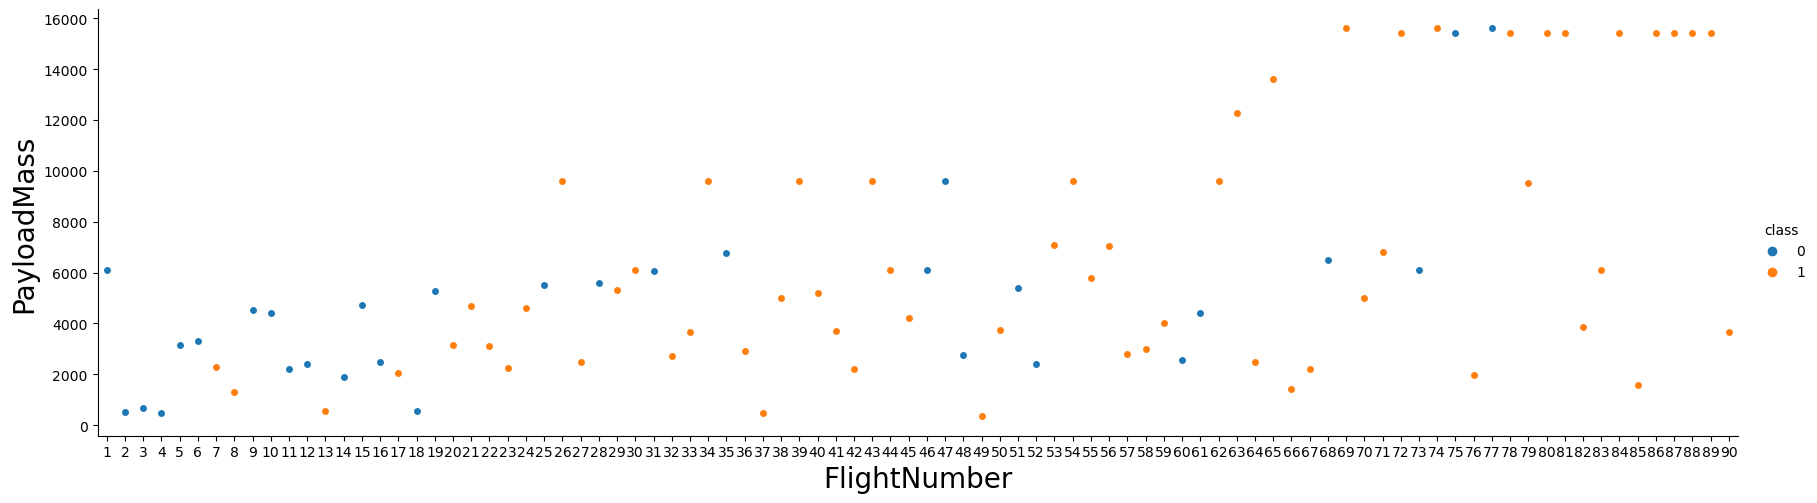

In [57]:
sns.catplot(x='FlightNumber',y='PayloadMass',data=data,hue='class',aspect=3.5)
plt.xlabel('FlightNumber',fontsize=20)
plt.ylabel('PayloadMass',fontsize=20)
plt.show()

In [50]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'class'],
      dtype='object')

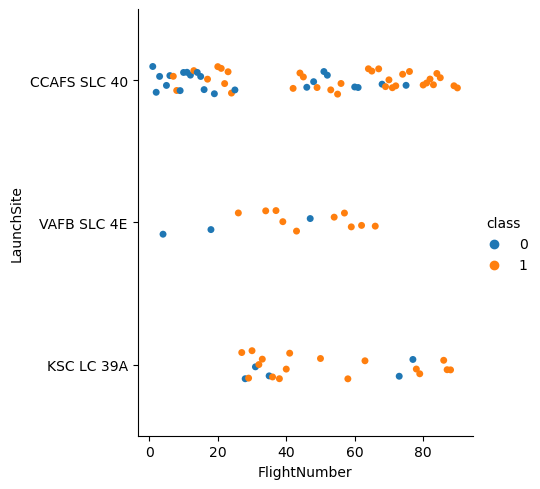

In [58]:
sns.catplot(x='FlightNumber',y='LaunchSite',hue='class',data=data)
plt.show()

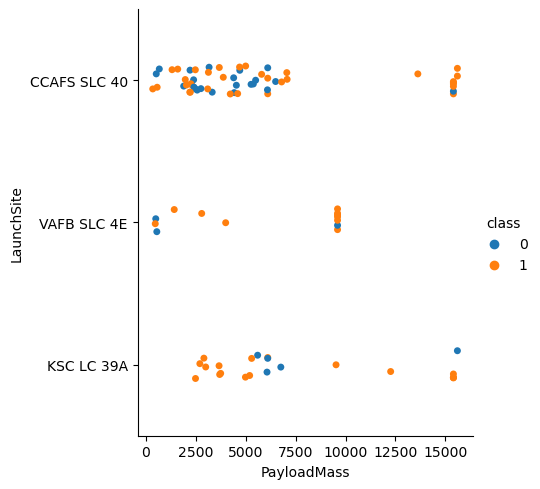

In [60]:
sns.catplot(x='PayloadMass',y='LaunchSite',hue='class',data=data)
plt.show()

C:\Users\Bhuvnesh's PC\AppData\Local\Temp\ipykernel_12776\744999377.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  LsSR=data.groupby('LaunchSite').mean()


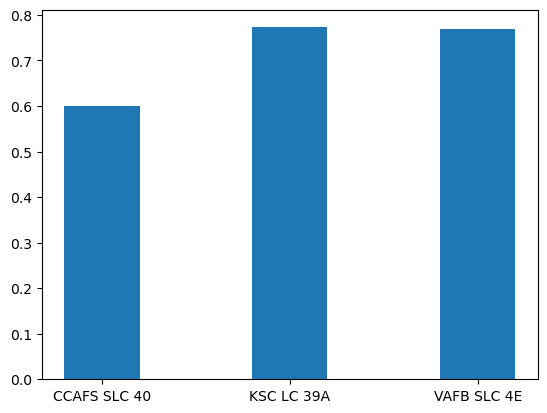

In [61]:
LsSR=data.groupby('LaunchSite').mean()
plt.bar(x=LsSR.index,height=LsSR['class'],width=.4)
plt.xlabel=('Launch Site')
plt.ylabel=('Success Rate')
plt.show()

C:\Users\Bhuvnesh's PC\AppData\Local\Temp\ipykernel_12776\1964263924.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  orbit_mean = data.groupby('Orbit').mean()


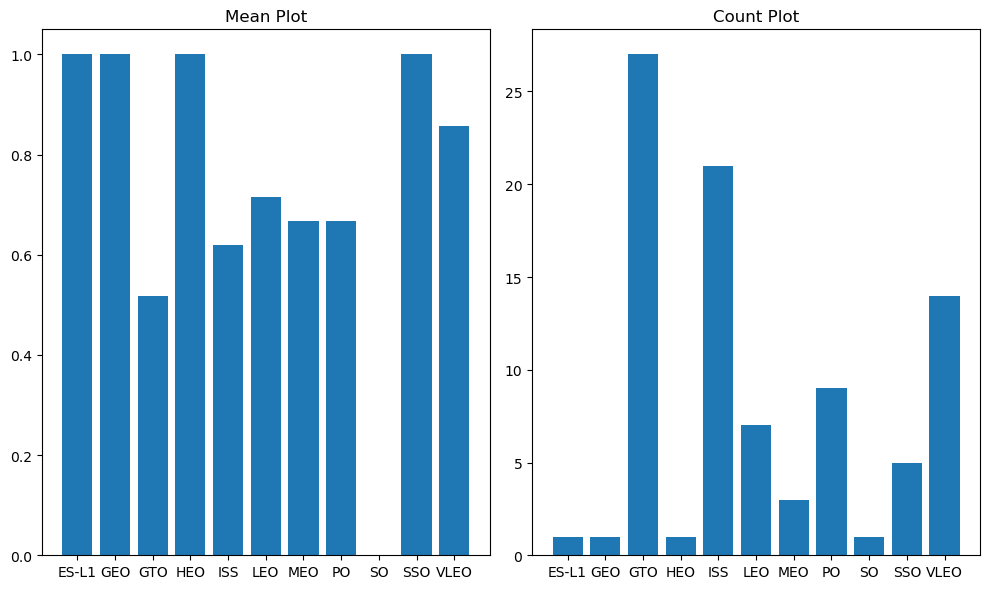

In [63]:
plt.figure(figsize=(10,6))

plt.subplot(1, 2, 1)
orbit_mean = data.groupby('Orbit').mean()
plt.bar(x=orbit_mean.index, height=orbit_mean['class'])
plt.title('Mean Plot')

plt.subplot(1, 2, 2)
orbit_count = data.groupby('Orbit').count()
plt.bar(x=orbit_count.index, height=orbit_count['class'])
plt.title('Count Plot')

plt.tight_layout()
plt.show()


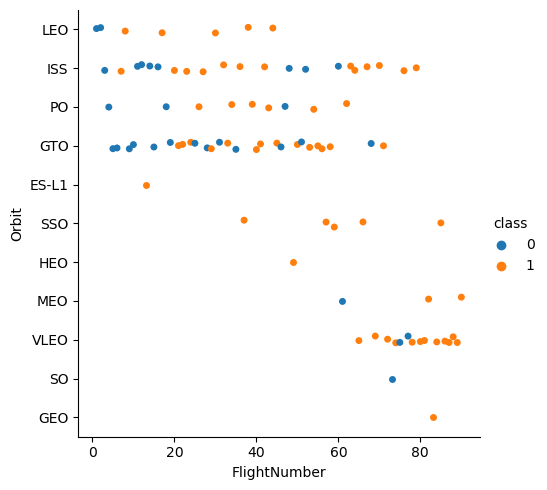

In [64]:
sns.catplot(x='FlightNumber',y='Orbit',data=data,hue='class')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


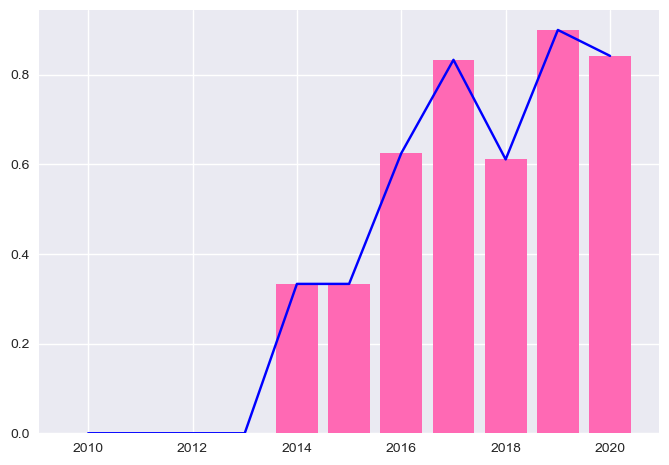

In [133]:
SR=data.groupby('year').mean('class')['class']
Succes_Rate=pd.DataFrame(SR)
fig,ax=plt.subplots()
ax.plot(Succes_Rate,color='blue')
ax.bar(Succes_Rate.index,Succes_Rate['class'],color='hotpink')
ax.xlabel='Year'
ax.ylabel='Success Rate'
plt.show()

In [113]:
Success_Rate

,class
year,
2010,0.000000
2012,0.000000
2013,0.000000
2014,0.333333
2015,0.333333
2016,0.625000
2017,0.833333
2018,0.611111
2019,0.900000


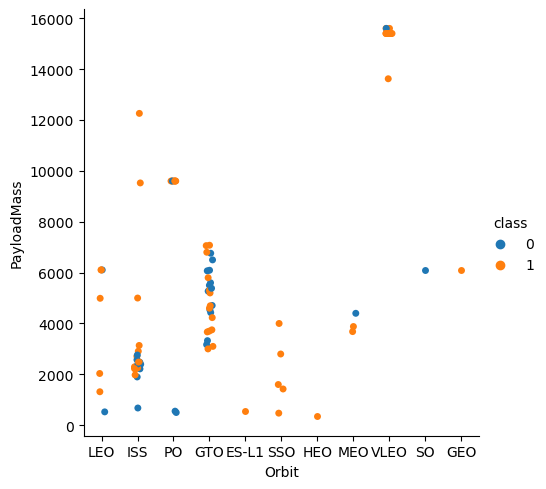

In [107]:
sns.catplot(y='PayloadMass',x='Orbit',data=data,hue='class')
plt.show()

In [66]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month

In [67]:
data['BoosterVersion'].value_counts()

Falcon 9    90
Name: BoosterVersion, dtype: int64

C:\Users\Bhuvnesh's PC\AppData\Local\Temp\ipykernel_12776\1781148711.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_mean = data.groupby('year').mean()


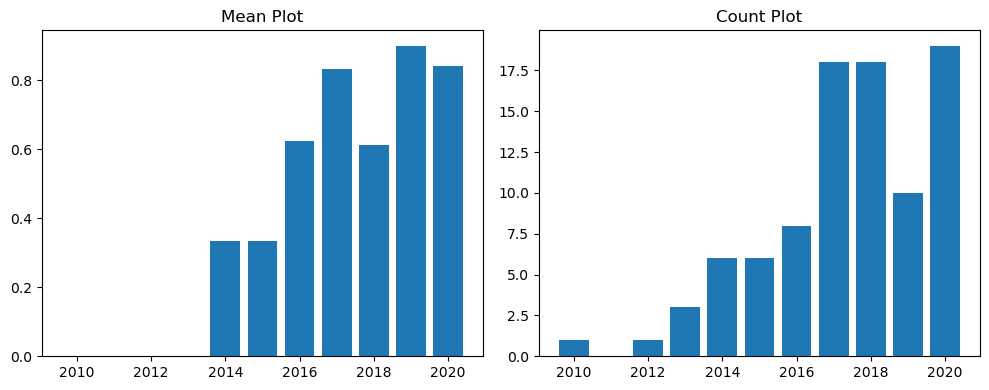

In [68]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
year_mean = data.groupby('year').mean()
plt.bar(x=year_mean.index, height=year_mean['class'])
plt.title('Mean Plot')

plt.subplot(1, 2, 2)
year_count = data.groupby('year').count()
plt.bar(x=year_count.index, height=year_count['class'])
plt.title('Count Plot')

plt.tight_layout()
plt.show()


In [70]:
df_dummies = pd.get_dummies(data[['Orbit','LaunchSite']])
df= pd.concat([data, df_dummies], axis=1)

In [71]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'class', 'year', 'month', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO',
       'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO',
       'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E'],
      dtype='object')

In [72]:
df=df.astype('float64',errors='ignore')

In [74]:
df.drop(['Orbit','LaunchSite'],axis=1,inplace=True)

In [75]:
df.head(6)

,FlightNumber,Date,BoosterVersion,PayloadMass,Outcome,Flights,GridFins,Reused,Legs,LandingPad,...,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1.0,2010-06-04,Falcon 9,6104.959412,None None,1.0,0.0,0.0,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,2012-05-22,Falcon 9,525.000000,None None,1.0,0.0,0.0,0.0,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,2013-03-01,Falcon 9,677.000000,None None,1.0,0.0,0.0,0.0,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,2013-09-29,Falcon 9,500.000000,False Ocean,1.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,2013-12-03,Falcon 9,3170.000000,None None,1.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,6.0,2014-01-06,Falcon 9,3325.000000,None None,1.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [77]:
df.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Outcome',
       'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block',
       'ReusedCount', 'Serial', 'Longitude', 'Latitude', 'class', 'year',
       'month', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO',
       'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO',
       'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40',
       'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E'],
      dtype='object')

In [ ]:
def plot_confusion_matrix(y,y_predict):

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land','landed']) 
    plt.show() 

In [83]:
df1=df.drop(['Date','BoosterVersion','Outcome','LandingPad','Longitude', 'Latitude','year','Serial','month'],axis=1)

transformer = preprocessing.StandardScaler()
x['PayloadMass']=transformer.fit_transform(x['PayloadMass'])
x_test['PayloadMass']=transformer.transform(x_test['PayloadMass'])


In [84]:
df1

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,class,Orbit_ES-L1,...,Orbit_ISS,Orbit_LEO,Orbit_MEO,Orbit_PO,Orbit_SO,Orbit_SSO,Orbit_VLEO,LaunchSite_CCAFS SLC 40,LaunchSite_KSC LC 39A,LaunchSite_VAFB SLC 4E
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FlightNumber             90 non-null     float64
 1   PayloadMass              90 non-null     float64
 2   Flights                  90 non-null     float64
 3   GridFins                 90 non-null     float64
 4   Reused                   90 non-null     float64
 5   Legs                     90 non-null     float64
 6   Block                    90 non-null     float64
 7   ReusedCount              90 non-null     float64
 8   class                    90 non-null     float64
 9   Orbit_ES-L1              90 non-null     float64
 10  Orbit_GEO                90 non-null     float64
 11  Orbit_GTO                90 non-null     float64
 12  Orbit_HEO                90 non-null     float64
 13  Orbit_ISS                90 non-null     float64
 14  Orbit_LEO                90 

In [90]:
x=df1.drop('class',axis=1)
y=df1['class']

In [91]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FlightNumber             90 non-null     float64
 1   PayloadMass              90 non-null     float64
 2   Flights                  90 non-null     float64
 3   GridFins                 90 non-null     float64
 4   Reused                   90 non-null     float64
 5   Legs                     90 non-null     float64
 6   Block                    90 non-null     float64
 7   ReusedCount              90 non-null     float64
 8   Orbit_ES-L1              90 non-null     float64
 9   Orbit_GEO                90 non-null     float64
 10  Orbit_GTO                90 non-null     float64
 11  Orbit_HEO                90 non-null     float64
 12  Orbit_ISS                90 non-null     float64
 13  Orbit_LEO                90 non-null     float64
 14  Orbit_MEO                90 

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=34)

In [ ]:
'''params={'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': [0.01,0.1,1],
              'gamma':[0.01,0.1,1]}
svc_cv=GridSearchCV(SVC(),param_grid=params,njobs=-1)'''

In [ ]:
'''svc_cv.fit( x_train,y_train)
y_pred=scv_cv.predict(x_test)
acc_svc=accuracy_score(y_test,y_pred)'''

In [97]:
def algo_test(x_train,y_train,x_test,y_test):
    
    knn_parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
    KNN = KNeighborsClassifier()
    KNN.fit(x_train,y_train)
    y_pred=KNN.predict(x_test)
    acc_knn=accuracy_score(y_test,y_pred)
    print(f'accuracy of KNN is {acc_knn}')
    
    knn_cv=GridSearchCV(KNN,param_grid=knn_parameters,cv=5,n_jobs=-1)
    knn_cv.fit(x_train,y_train)
    y_pred=knn_cv.predict(x_test)
    acc_knn_cv=accuracy_score(y_test,y_pred)
    print(f'accuracy of KNN_cv is {acc_knn_cv}')
    
   
    svc1=SVC()
    svc1.fit(x_train,y_train)
    y_pred2=svc1.predict(x_test)
    acc_svc=accuracy_score(y_test,y_pred2)
    print(f'accuracy of SVC is {acc_svc}')

    lr=LogisticRegression(max_iter=500)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc_lr=accuracy_score(y_test,y_pred)
    print(f'accuracy of Logistic regression is {acc_lr}')

    lr_gcv=GridSearchCV(lr,param_grid={'C':[0.01,0.1,1,1.5],'penalty':['l1','l2']},cv=15)
    lr_gcv.fit(x_train,y_train)
    y_pred=lr_gcv.best_estimator_.predict(x_test)
    acc_lrcv=accuracy_score(y_test,y_pred)
    print(f'accuracy of LR_cv is {acc_lrcv}')
    
    tree_parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}
    
    tree = DecisionTreeClassifier()
    tree.fit(x_train,y_train)
    y_predt=tree.predict(x_test)
    acc_tree=accuracy_score(y_test,y_predt)
    print(f'accuracy of tree_cv is {acc_tree}')
    
    tree_cv=GridSearchCV(tree,param_grid=tree_parameters,cv=15,n_jobs=-1)
    tree_cv.fit(x_train,y_train)
    y_predtcv=tree_cv.predict(x_test)
    acc_tree_cv=accuracy_score(y_test,y_predtcv)
    print(f'accuracy of tree_cv is {acc_tree_cv}')


In [98]:
accuracy =algo_test(x_train,y_train,x_test,y_test)

accuracy of KNN is 0.5185185185185185
accuracy of KNN_cv is 0.5555555555555556
accuracy of SVC is 0.5925925925925926
accuracy of Logistic regression is 0.8148148148148148


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_l

accuracy of LR_cv is 0.8148148148148148
accuracy of tree_cv is 0.7777777777777778
accuracy of tree_cv is 0.7407407407407407
